# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.085996e+01     7.786987e+00
 * time: 0.004106998443603516
     1     2.717855e+01     4.485787e+00
 * time: 0.012290000915527344
     2     1.911259e+01     4.740335e+00
 * time: 0.03208804130554199
     3     1.214571e+01     1.760323e+00
 * time: 0.055665016174316406
     4     1.127827e+01     3.841803e+00
 * time: 0.07037901878356934
     5     1.075539e+01     1.754993e+00
 * time: 0.08485102653503418
     6     9.734862e+00     1.831633e+00
 * time: 0.09919500350952148
     7     9.275885e+00     8.129599e-01
 * time: 0.11327910423278809
     8     8.877167e+00     5.678598e-01
 * time: 0.12776994705200195
     9     8.837438e+00     1.391801e+00
 * time: 0.13870811462402344
    10     8.749720e+00     8.122147e-01
 * time: 0.14951205253601074
    11     8.682368e+00     7.081793e-01
 * time: 0.16046905517578125
    12     8.650946e+00     7.128571e-01
 * time: 0.1713581085205078
    13     8.625106e+00     3.088792e-01
 * tim

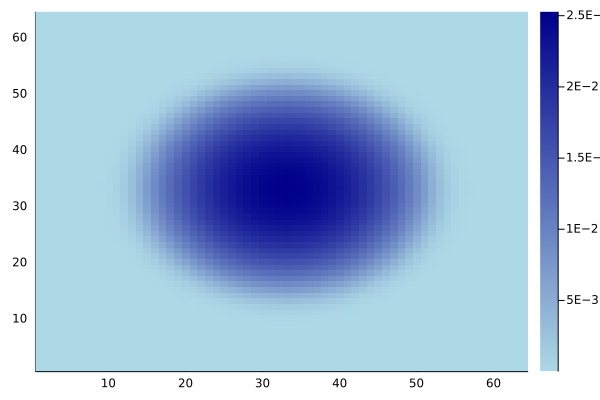

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)